## World Happiness Report 2016 Data Exploration

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
happiness_report_2015 = pd.read_csv('2015.csv')
happiness_report_2016 = pd.read_csv('2016.csv')
happiness_report_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


## Plotting Pearson's Correlation

- I would like to know which of the variables with high correlation coefficient (+ve / -ve) especially to the Happiness Score, with hopes of finding something interesting.

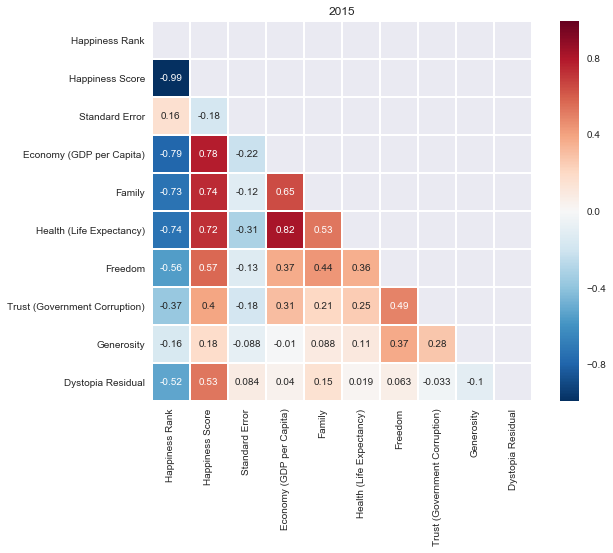

In [3]:
# Plotting heatmap of pearson's correlation for 2015
fig, axes = plt.subplots(figsize=(10, 7))
corr = happiness_report_2015.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr,linewidths=1,annot=True, mask=mask, vmax=.3, square=True)
axes.set_title("2015")

### From the matrix plot above the variables with the highest correlation coefficient in 2015 are:

- Economy (GDP per Capita) -> Happiness Score | 0.78
- Family -> Happiness Score | 0.74
- Family -> Economy (GDP per Capita) | 0.65
- Health (Life Expentacy) -> Happiness Score |0.72

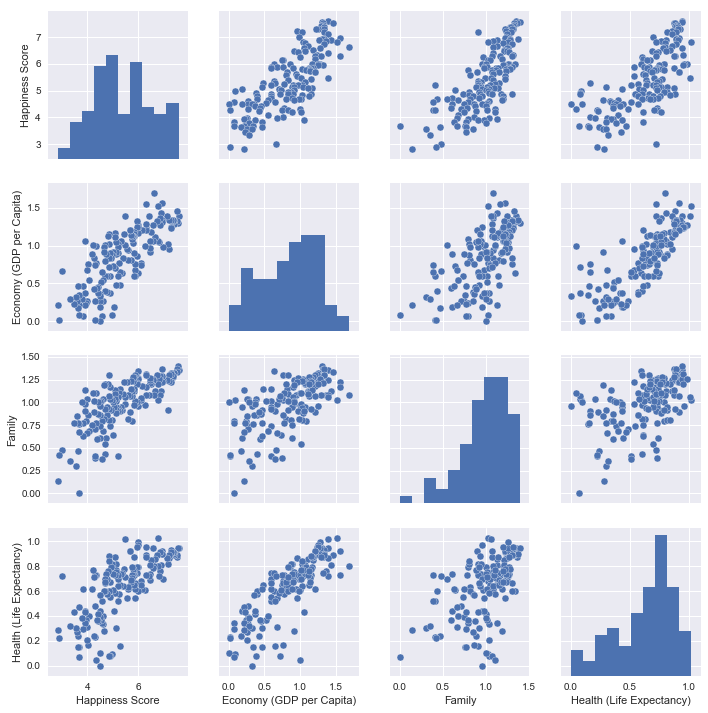

In [4]:
sns.pairplot(happiness_report_2015[['Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)']])

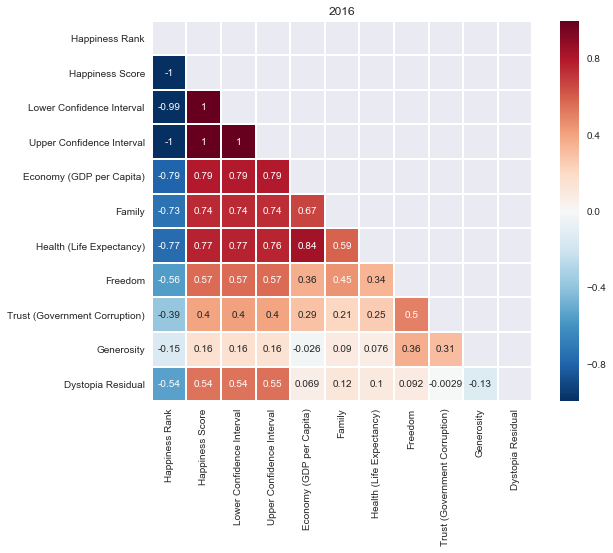

In [5]:
# Plotting heatmap of pearson's correlation for 2016
fig, axes = plt.subplots(figsize=(10, 7))
corr = happiness_report_2016.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr,linewidths=1,annot=True, mask=mask, vmax=.3, square=True)
axes.set_title("2016")

### From the matrix plot above the variables with the highest correlation coefficient in 2016 are:

- Economy (GDP per Capita) -> Happiness Score | 0.79
- Family -> Happiness Score | 0.74
- Family -> Economy (GDP per Capita) | 0.67
- Health (Life Expentacy) -> Happiness Score |0.76

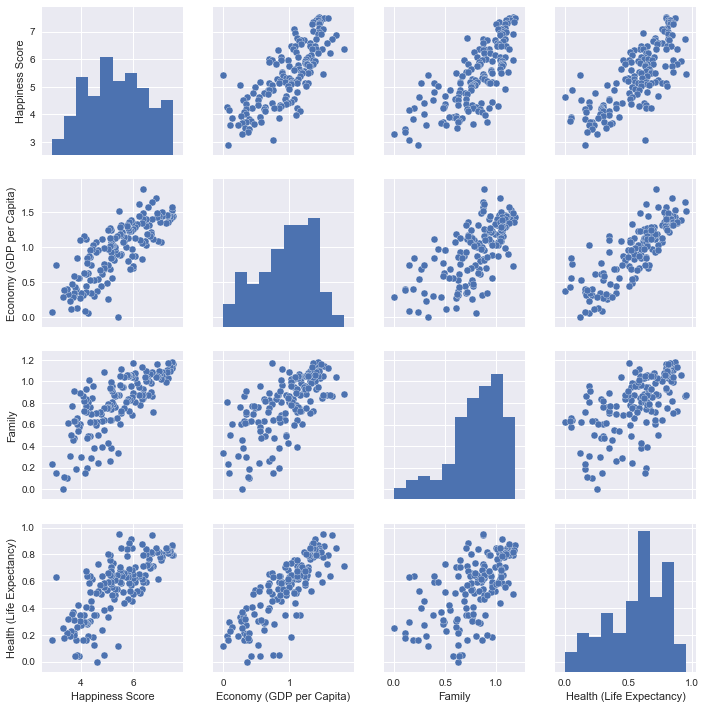

In [6]:
sns.pairplot(happiness_report_2016[['Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)']])

C:\Users\phemmybode\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


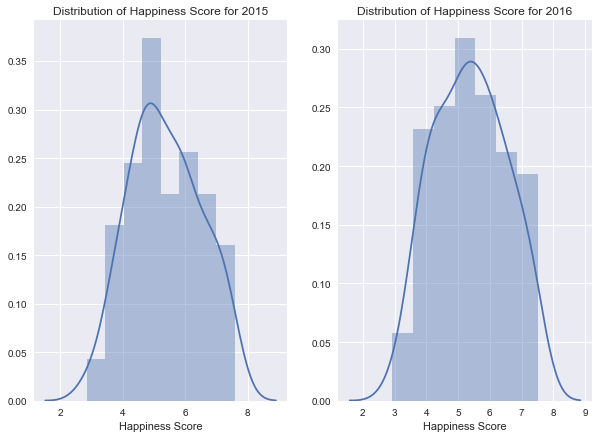

In [7]:
#plt.plot(happiness_report_2015['Happiness Score'])
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10, 7))
sns.distplot(happiness_report_2015['Happiness Score'],kde=True,ax=axes[0])
sns.distplot(happiness_report_2016['Happiness Score'],kde=True,ax=axes[1])
axes[0].set_title("Distribution of Happiness Score for 2015")
axes[1].set_title("Distribution of Happiness Score for 2016")

## Comparing Happiness Scores in different Regions between 2015 & 2016

In [8]:
happiness_report_2015['Year'] = '2015'
happiness_report_2016['Year'] = '2016'
happiness_report_2015_2016 = pd.concat([happiness_report_2015[['Happiness Score','Region','Year']],happiness_report_2016[['Happiness Score','Region','Year']]])
happiness_report_2015_2016.head()

,Happiness Score,Region,Year
0,7.587,Western Europe,2015
1,7.561,Western Europe,2015
2,7.527,Western Europe,2015
3,7.522,Western Europe,2015
4,7.427,North America,2015


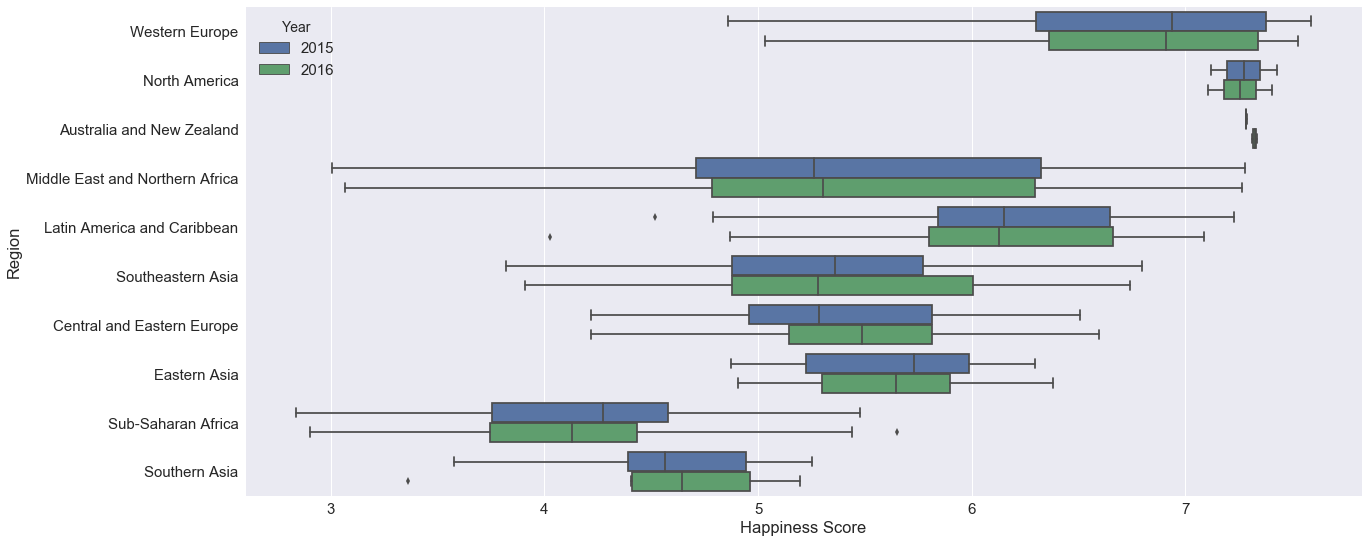

In [9]:
sns.set(font_scale=1.5)
fig, axes = plt.subplots(figsize=(20, 9))
sns.boxplot(y='Region',x='Happiness Score',hue='Year', data = happiness_report_2015_2016)


From the boxplot above, only 2 regions witnessed a significant increase in happiness score namely;
- Central and Eastern Europe
- Southern Asia

*while* the remaining 3 regions that witnessed a significant decrease in happiness score are;
- Southeastern Asia
- Eastern Asia
- Sub-Saharan Africa


Comments and Suggestions are appreciated :)